## Big Home Assignment 4

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, classification_report

In [3]:
heart_attack_data = pd.read_csv("datasets_bigHA/heart_attack.csv", sep=',')
heart_attack_data.shape, heart_attack_data, heart_attack_data.isnull().sum()

((303, 14),
      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
 0     63    1   3     145   233    1        0       150     0      2.3    0   
 1     37    1   2     130   250    0        1       187     0      3.5    0   
 2     41    0   1     130   204    0        0       172     0      1.4    2   
 3     56    1   1     120   236    0        1       178     0      0.8    2   
 4     57    0   0     120   354    0        1       163     1      0.6    2   
 ..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
 298   57    0   0     140   241    0        1       123     1      0.2    1   
 299   45    1   3     110   264    0        1       132     0      1.2    1   
 300   68    1   0     144   193    1        1       141     0      3.4    1   
 301   57    1   0     130   131    0        1       115     1      1.2    1   
 302   57    0   1     130   236    0        0       174     0      0.0    1   
 
      caa  thall  output  

In [4]:
quality_of_wine_data = pd.read_csv("datasets_bigHA/quality_of_wine.csv", sep=',')
quality_of_wine_data.shape, quality_of_wine_data, quality_of_wine_data.isnull().sum()

((32485, 14),
        Unnamed: 0  fixed acidity  volatile acidity  citric acid  \
 0            2732            7.4             0.170         0.29   
 1            2607            5.3             0.310         0.38   
 2            1653            4.7             0.145         0.29   
 3            3264            6.9             0.260         0.29   
 4            4931            6.4             0.450         0.07   
 ...           ...            ...               ...          ...   
 32480        2838            5.0             0.255         0.22   
 32481        6414            6.6             0.360         0.52   
 32482        1126            6.3             0.200         0.24   
 32483        2924            6.2             0.200         0.33   
 32484        5462            8.1             0.280         0.46   
 
        residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
 0                 1.4      0.047                 23.0                 107.0   
 1      

In [5]:
data_scientists_job_change_data = pd.read_csv("datasets_bigHA/Job_Change_of_Data_Scientists.csv", sep=',')
data_scientists_job_change_data.shape, data_scientists_job_change_data, data_scientists_job_change_data.isnull().sum()

((19158, 14),
        enrollee_id      city  city_development_index gender  \
 0             8949  city_103                   0.920   Male   
 1            29725   city_40                   0.776   Male   
 2            11561   city_21                   0.624    NaN   
 3            33241  city_115                   0.789    NaN   
 4              666  city_162                   0.767   Male   
 ...            ...       ...                     ...    ...   
 19153         7386  city_173                   0.878   Male   
 19154        31398  city_103                   0.920   Male   
 19155        24576  city_103                   0.920   Male   
 19156         5756   city_65                   0.802   Male   
 19157        23834   city_67                   0.855    NaN   
 
            relevent_experience enrolled_university education_level  \
 0      Has relevent experience       no_enrollment        Graduate   
 1       No relevent experience       no_enrollment        Graduate   
 2 

In [6]:
data_scientists_job_change_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## Preprocessing

In [7]:
data_scientists_job_change_data.columns = ['enrollee_id', 'city_nom', 'city_development_index', 'gender_nom',
       'relevent_experience_nom', 'enrolled_university_nom', 'education_level_ord',
       'major_discipline_nom', 'experience_ord', 'company_size_ord', 'company_type_nom',
       'last_new_job_ord', 'training_hours', 'target']

In [8]:
del data_scientists_job_change_data["enrollee_id"]

In [9]:
def OrdMapping(df):
    
    
    education_level_ord_mapping = {'Primary School': 0,'High School': 1,'Graduate': 2 , 'Masters':3,'Phd': 4 }
    experience_ord_mapping= {'<1':0, '1':2, '2':3, '3':4,'4':5, '5':6, '6':7, '7':8, '8':9,'9':10, '10':11, '12':13, '13':14,'14':15, '15':16, '16':17,  '17':18,'18':19, '19':20,'20':21,'>20':22}
    company_size_ord_mapping = {'<10':0 ,'10/49':1,'50-99':2, '100-500':3, '500-999':4, '1000-4999':5,'5000-9999':6, '10000+':7}
    
    last_new_job_ord_mapping = {'never':0,'1':1,'2':2,'3':3,'4':4,'>4':5}
    df['education_level_ord'] = df.education_level_ord.map(education_level_ord_mapping)
    df['experience_ord'] = df.experience_ord.map(experience_ord_mapping)
    df['company_size_ord'] = df.company_size_ord.map(company_size_ord_mapping)
    df['last_new_job_ord'] = df.last_new_job_ord.map(last_new_job_ord_mapping)
     
    return df

In [10]:
data_scientists_job_change_data = OrdMapping(data_scientists_job_change_data)

In [11]:
ordinals = [c for c in data_scientists_job_change_data.columns if 'ord' in c]
nominals = [c for c in data_scientists_job_change_data.columns if 'nom' in c]

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler

for c in nominals:
    le = LabelEncoder()
    le.fit(list(data_scientists_job_change_data[c].astype(str)))
    data_scientists_job_change_data[c] = le.transform(data_scientists_job_change_data[c].astype(str))
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('target mapping :  ',c ,  le_name_mapping)

target mapping :   city_nom {'city_1': 0, 'city_10': 1, 'city_100': 2, 'city_101': 3, 'city_102': 4, 'city_103': 5, 'city_104': 6, 'city_105': 7, 'city_106': 8, 'city_107': 9, 'city_109': 10, 'city_11': 11, 'city_111': 12, 'city_114': 13, 'city_115': 14, 'city_116': 15, 'city_117': 16, 'city_118': 17, 'city_12': 18, 'city_120': 19, 'city_121': 20, 'city_123': 21, 'city_126': 22, 'city_127': 23, 'city_128': 24, 'city_129': 25, 'city_13': 26, 'city_131': 27, 'city_133': 28, 'city_134': 29, 'city_136': 30, 'city_138': 31, 'city_139': 32, 'city_14': 33, 'city_140': 34, 'city_141': 35, 'city_142': 36, 'city_143': 37, 'city_144': 38, 'city_145': 39, 'city_146': 40, 'city_149': 41, 'city_150': 42, 'city_152': 43, 'city_155': 44, 'city_157': 45, 'city_158': 46, 'city_159': 47, 'city_16': 48, 'city_160': 49, 'city_162': 50, 'city_165': 51, 'city_166': 52, 'city_167': 53, 'city_171': 54, 'city_173': 55, 'city_175': 56, 'city_176': 57, 'city_179': 58, 'city_18': 59, 'city_180': 60, 'city_19': 61,

In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

cats = ordinals + nominals

imp = SimpleImputer(strategy = "most_frequent")
data_scientists_job_change_data[cats] = imp.fit_transform(data_scientists_job_change_data[cats])

In [14]:
data_scientists_job_change_data.isnull().sum()

city_nom                   0
city_development_index     0
gender_nom                 0
relevent_experience_nom    0
enrolled_university_nom    0
education_level_ord        0
major_discipline_nom       0
experience_ord             0
company_size_ord           0
company_type_nom           0
last_new_job_ord           0
training_hours             0
target                     0
dtype: int64

In [15]:
nums = [c for c in data_scientists_job_change_data.columns if c not in cats and c != "target"]

In [16]:
ss = StandardScaler()
data_scientists_job_change_data[nums] = ss.fit_transform(data_scientists_job_change_data[nums])

In [17]:
data_scientists_job_change_data.shape, data_scientists_job_change_data, data_scientists_job_change_data.isnull().sum()

((19158, 13),
        city_nom  city_development_index  gender_nom  relevent_experience_nom  \
 0           5.0                0.738919         1.0                      0.0   
 1          77.0               -0.428410         1.0                      1.0   
 2          64.0               -1.660590         3.0                      1.0   
 3          14.0               -0.323026         3.0                      1.0   
 4          50.0               -0.501368         1.0                      0.0   
 ...         ...                     ...         ...                      ...   
 19153      55.0                0.398448         1.0                      1.0   
 19154       5.0                0.738919         1.0                      0.0   
 19155       5.0                0.738919         1.0                      0.0   
 19156      94.0               -0.217642         1.0                      0.0   
 19157      95.0                0.212000         3.0                      1.0   
 
        enro

## Preparing functions to perform classification on our selected data using Lacy FCA Algorithm.

In [18]:
import fcalc1 as fcalc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import Binarizer, LabelEncoder

def fcalc_cross_validation(method, alpha, data, target, folds=5, verbose=0, categorical=None):
    """
    Cross validation for counting Lazy FCA classifier avarage accuracy.
    Arguments:
        data (pandas.DataFrame) -- data frame with data for counting avarage accuracy
        folds (int) -- number of folds for cross validation
        verbose (int) -- value for controling logging, if 0 won't log anything otherwise print computation steps
        interval_constructor (method) -- method for computing interval (default None)
    Return: 
        avarage accuracy (float) -- return avarage accuracy for all folds
        avarage f1 score (float) -- return avarage f1 score for all folds
    """
    accuracies = np.array([])
    f1_scores = np.array([])
    fold_size = int(np.ceil(data.shape[0] / folds))

    for i in range(0, data.shape[0], fold_size):
        X_train = pd.concat([data.iloc[: i], data.iloc[i + fold_size:]])
        y_train = pd.concat([target.iloc[: i], target.iloc[i + fold_size:]])

        X_test = data.iloc[i : i + fold_size]
        y_test = target.iloc[i : i + fold_size]

        if verbose:
            print(f"Fold {i // fold_size + 1}")
        bin_cls = fcalc.classifier.PatternBinaryClassifier(X_train.values, y_train.to_numpy(), categorical=categorical, method=method, alpha=alpha)
        prediction = bin_cls.predict(X_test.values)

        accuracy = accuracy_score(y_test, bin_cls.predictions)
        f1 = f1_score(y_test, bin_cls.predictions, average='macro')

        accuracies = np.append(accuracies, accuracy)
        f1_scores = np.append(f1_scores, f1)
        if verbose:
            print("Accuracy for fold %d is %.2f \n"%(i // fold_size + 1, accuracy))
            print("F1 Score for fold %d is %.2f \n"%(i // fold_size + 1, f1))

    return np.average(accuracies), np.average(f1_scores)

In [19]:
def fcals_performer(X_train, y_train, X_test, y_test, categorical=None, methods=["standard", "standard-support", "ratio-support"], alphas=[0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1., 1.2]):
    best_acc = 0
    best_method = "standard"
    best_alpha = 0.

    for method in methods:
        accs = []
        for alpha in alphas:
            acc, f1 = fcalc_cross_validation(method, alpha, X_train, y_train, verbose=1, folds=2, categorical=categorical)
            accs.append(acc)
           
            print(f"Accuracy for fcalc(method={method}, alpha={alpha}): {acc}")
            print(f"F1 Score for fcalc(method={method}, alpha={alpha}): {f1}")

            if (acc > best_acc):
                best_acc = acc
                best_method = method
                best_alpha = alpha
        
        plt.figure()
        plt.plot(alphas, accs)
        plt.title(f"{method} Method Accuracies")
        plt.xlabel('Parameter Alpha', fontsize=12)
        plt.ylabel('Accuracy', fontsize=12)
        plt.grid(True)
        plt.show()
    
    bin_cls = fcalc.classifier.PatternBinaryClassifier(X_train.values, y_train.to_numpy(), method=best_method, alpha=best_alpha, categorical=categorical)
    prediction = bin_cls.predict(X_test.values)
    best_accuracy = accuracy_score(y_test, bin_cls.predictions)
    best_f1 = f1_score(y_test, bin_cls.predictions, average='macro')

    print("========================================================================")
    print(f"fcalc(method={best_method}, alpha={best_alpha}) test Accuracy: {best_accuracy}")
    print(f"fcalc(method={best_method}, alpha={best_alpha}) test F1 Score: {best_f1}")

## Features choosing
Now it is high time to take just importaint features. We'll do this with the help of xjboost

In [20]:
from xgboost import XGBClassifier

def xGboost_flow(X_train, X_test, y_train, y_test, n_estimators=500, max_depth=5, 
                 learning_rate=0.5, colsample_bytree=0.70, n_jobs=4, objective='binary:logistic'):
    best_f1_score = 0.5
    best_learning_rate = learning_rate
    
    while learning_rate > 0.01:
        classifier = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, 
                               learning_rate=learning_rate, objective=objective, 
                               colsample_bytree=colsample_bytree, n_jobs=n_jobs)
        accuracies = cross_val_score(classifier, X_train, y_train, scoring="accuracy", cv = 5)
        print(f"accuracy mean value: {accuracies.mean()}")
        print(f"accuracy STD value: {accuracies.std()}")
        print(f"========================================")
        
        if accuracies.mean() < best_f1_score:
            best_f1_score = accuracies.mean()
            best_learning_rate = learning_rate
            
        learning_rate -= 0.05
    
    final_classifier = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, 
                               learning_rate=best_learning_rate, objective=objective, 
                               colsample_bytree=colsample_bytree, n_jobs=n_jobs)
    final_classifier.fit(X_train, y_train)
    
    importances = final_classifier.feature_importances_
    
    feature_names = X_train.columns
    feature_importances = sorted(zip(importances, feature_names), reverse=True)

    print("Feature importances:")
    for importance, name in feature_importances:
        print(f"{name}: {importance}")

    
    # Visualisation of feature importance
    plt.figure(figsize=(17, 10))
    sorted_idx = np.argsort(final_classifier.feature_importances_)[::-1]
    sns.barplot(x=final_classifier.feature_importances_[sorted_idx], y=X_train.columns[sorted_idx])
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title('Visualizing Important Features')
    plt.show()
    
    print(f"XgBoost test Accuracy: {final_classifier.score(X_test, y_test)}")
    print(f"XgBoost test F1 Score\n: {classification_report(y_test, final_classifier.predict(X_test))}")

## Heart attacks data analysis:

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()

heart_attack_target = heart_attack_data['output']
heart_attack_new_data = heart_attack_data.drop(columns = ['output'], axis = 1)

for col in heart_attack_new_data.columns:
    le.fit(heart_attack_new_data[col])
    heart_attack_new_data[col] = le.transform(heart_attack_new_data[col])

heart_attack_X_train, heart_attack_X_test, heart_attack_y_train, heart_attack_y_test = train_test_split(heart_attack_data, heart_attack_target, test_size=.2)

accuracy mean value: 1.0
accuracy STD value: 0.0
accuracy mean value: 1.0
accuracy STD value: 0.0
accuracy mean value: 1.0
accuracy STD value: 0.0
accuracy mean value: 1.0
accuracy STD value: 0.0
accuracy mean value: 1.0
accuracy STD value: 0.0
accuracy mean value: 1.0
accuracy STD value: 0.0
accuracy mean value: 1.0
accuracy STD value: 0.0
accuracy mean value: 1.0
accuracy STD value: 0.0
accuracy mean value: 1.0
accuracy STD value: 0.0
accuracy mean value: 1.0
accuracy STD value: 0.0
Feature importances:
output: 0.7130018472671509
caa: 0.07259926944971085
cp: 0.07140669971704483
slp: 0.05020544305443764
thall: 0.04376779869198799
sex: 0.012376653961837292
thalachh: 0.010313709266483784
oldpeak: 0.009934766218066216
exng: 0.008344853296875954
age: 0.006610744632780552
chol: 0.0014382019871845841
trtbps: 0.0
restecg: 0.0
fbs: 0.0


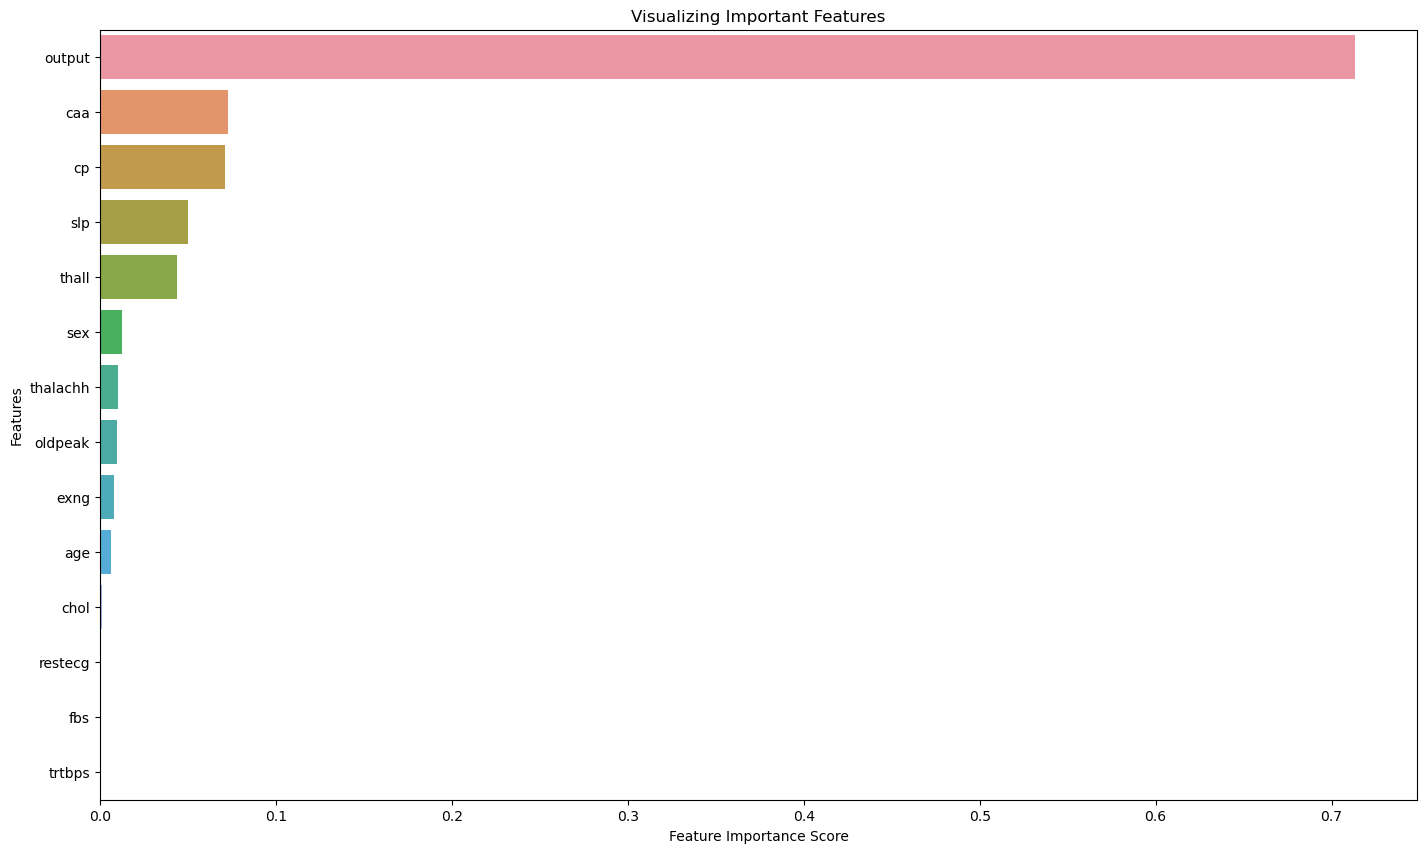

XgBoost test Accuracy: 1.0
XgBoost test F1 Score
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        27

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



In [22]:
xGboost_flow(heart_attack_X_train, heart_attack_X_test, heart_attack_y_train, heart_attack_y_test)

## Heart attacks probability classification


In [23]:
import pandas as pd
from sklearn.preprocessing import Binarizer

# Removing features with low importance
low_importance_features = ['trtbps', 'fbs', 'restecg']
heart_attack_data = heart_attack_data.drop(low_importance_features, axis=1)

# Splitting the dataset into features and target variable
heart_attack_target = heart_attack_data['output']
heart_attack_data = heart_attack_data.drop(columns=['output'], axis=1)

# Splitting the data into training and test sets
heart_attack_X_train, heart_attack_X_test, heart_attack_y_train, heart_attack_y_test = train_test_split(heart_attack_data, heart_attack_target, test_size=0.3)

In [24]:
heart_attack_X_train.shape, heart_attack_X_train, heart_attack_X_train.isnull().sum()

((212, 10),
      age  sex  cp  chol  thalachh  exng  oldpeak  slp  caa  thall
 213   61    0   0   307       146     1      1.0    1    0      3
 255   45    1   0   309       147     1      0.0    1    3      3
 262   53    1   0   282        95     1      2.0    1    2      3
 248   54    1   1   283       195     0      0.0    2    1      3
 298   57    0   0   241       123     1      0.2    1    0      3
 ..   ...  ...  ..   ...       ...   ...      ...  ...  ...    ...
 59    57    0   0   303       159     0      0.0    2    1      2
 12    49    1   1   266       171     0      0.6    2    0      2
 132   42    1   1   295       162     0      0.0    2    0      2
 74    43    0   2   213       165     0      0.2    1    0      2
 76    51    1   2   245       166     0      2.4    1    0      2
 
 [212 rows x 10 columns],
 age         0
 sex         0
 cp          0
 chol        0
 thalachh    0
 exng        0
 oldpeak     0
 slp         0
 caa         0
 thall       0
 dtype

Fold 1
Accuracy for fold 1 is 0.00 

F1 Score for fold 1 is 0.00 

Fold 2
Accuracy for fold 2 is 0.02 

F1 Score for fold 2 is 0.02 

Accuracy for fcalc(method=standard, alpha=0.3): 0.009433962264150943
F1 Score for fcalc(method=standard, alpha=0.3): 0.01092896174863388
Fold 1
Accuracy for fold 1 is 0.00 

F1 Score for fold 1 is 0.00 

Fold 2
Accuracy for fold 2 is 0.00 

F1 Score for fold 2 is 0.00 

Accuracy for fcalc(method=standard, alpha=0.6): 0.0
F1 Score for fcalc(method=standard, alpha=0.6): 0.0
Fold 1
Accuracy for fold 1 is 0.00 

F1 Score for fold 1 is 0.00 

Fold 2
Accuracy for fold 2 is 0.00 

F1 Score for fold 2 is 0.00 

Accuracy for fcalc(method=standard, alpha=0.9): 0.0
F1 Score for fcalc(method=standard, alpha=0.9): 0.0


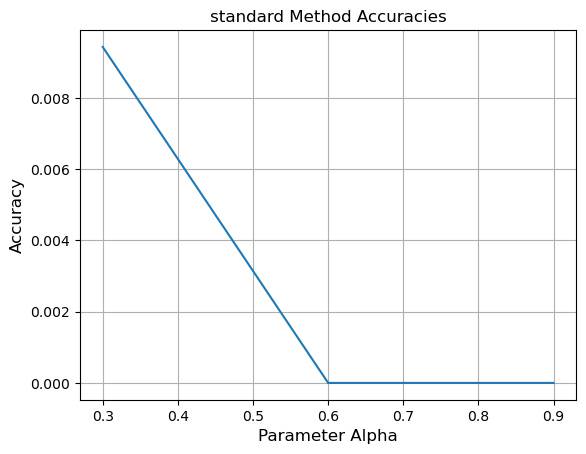

Fold 1
Accuracy for fold 1 is 0.37 

F1 Score for fold 1 is 0.37 

Fold 2
Accuracy for fold 2 is 0.35 

F1 Score for fold 2 is 0.35 

Accuracy for fcalc(method=standard-support, alpha=0.3): 0.3584905660377358
F1 Score for fcalc(method=standard-support, alpha=0.3): 0.3579763071167721
Fold 1
Accuracy for fold 1 is 0.37 

F1 Score for fold 1 is 0.37 

Fold 2
Accuracy for fold 2 is 0.35 

F1 Score for fold 2 is 0.35 

Accuracy for fcalc(method=standard-support, alpha=0.6): 0.3584905660377358
F1 Score for fcalc(method=standard-support, alpha=0.6): 0.3579763071167721
Fold 1
Accuracy for fold 1 is 0.37 

F1 Score for fold 1 is 0.37 

Fold 2
Accuracy for fold 2 is 0.35 

F1 Score for fold 2 is 0.35 

Accuracy for fcalc(method=standard-support, alpha=0.9): 0.3584905660377358
F1 Score for fcalc(method=standard-support, alpha=0.9): 0.3579763071167721


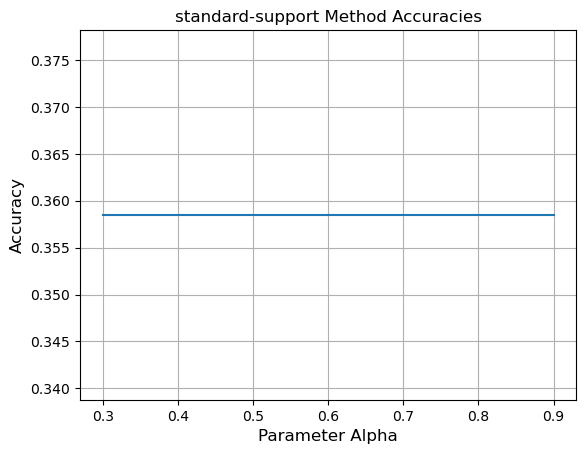

Fold 1
Accuracy for fold 1 is 0.72 

F1 Score for fold 1 is 0.70 

Fold 2
Accuracy for fold 2 is 0.90 

F1 Score for fold 2 is 0.89 

Accuracy for fcalc(method=ratio-support, alpha=0.3): 0.8066037735849056
F1 Score for fcalc(method=ratio-support, alpha=0.3): 0.797897224726493
Fold 1
Accuracy for fold 1 is 0.72 

F1 Score for fold 1 is 0.70 

Fold 2
Accuracy for fold 2 is 0.89 

F1 Score for fold 2 is 0.88 

Accuracy for fcalc(method=ratio-support, alpha=0.6): 0.8018867924528301
F1 Score for fcalc(method=ratio-support, alpha=0.6): 0.7945118400621118
Fold 1
Accuracy for fold 1 is 0.73 

F1 Score for fold 1 is 0.70 

Fold 2
Accuracy for fold 2 is 0.83 

F1 Score for fold 2 is 0.82 

Accuracy for fcalc(method=ratio-support, alpha=0.9): 0.7783018867924528
F1 Score for fcalc(method=ratio-support, alpha=0.9): 0.7641005850308177


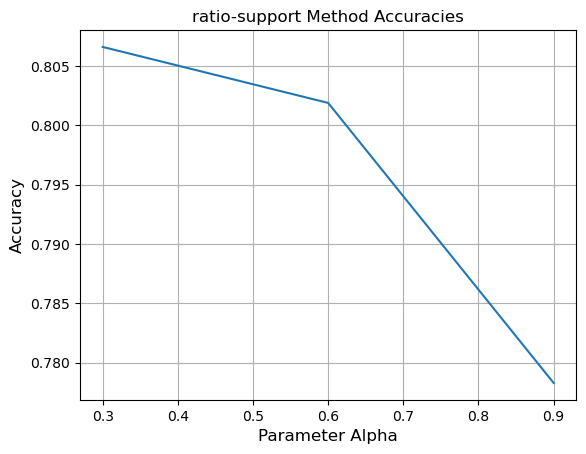

fcalc(method=ratio-support, alpha=0.3) test Accuracy: 0.8461538461538461
fcalc(method=ratio-support, alpha=0.3) test F1 Score: 0.8452380952380952


In [25]:
fcals_performer(heart_attack_X_train, heart_attack_y_train, heart_attack_X_test, heart_attack_y_test, alphas=[0.3, 0.6, 0.9])

## Conclusions
We have achieved really good results. Our macro f1-score and accuracy are really good).
Moreover, we can claim that this template based FCALC is much more stable on classification, as our F1 score is higher than during the binary classification analysis.

## Wine quality data analysis:

In [26]:
binarizer = Binarizer(threshold=5)
le = LabelEncoder()

quality_of_wine_new_data = quality_of_wine_data
quality_of_wine_new_target = binarizer.transform(quality_of_wine_data['quality'].values.reshape(-1,1))
quality_of_wine_new_data['Type'] = le.fit_transform(quality_of_wine_data['Type'])

quality_of_wine_new_data = quality_of_wine_new_data.drop(columns = ['quality'], axis = 1)

quality_of_wine_X_train, quality_of_wine_X_test, quality_of_wine_y_train, quality_of_wine_y_test = train_test_split(quality_of_wine_new_data, quality_of_wine_new_target, test_size=.2)

accuracy mean value: 0.9926887333925964
accuracy STD value: 0.0023820527792605246
accuracy mean value: 0.9923809375033084
accuracy STD value: 0.0022790197274047777
accuracy mean value: 0.9924578975809808
accuracy STD value: 0.002063450721386206
accuracy mean value: 0.9922655381064178
accuracy STD value: 0.0017864236826146773
accuracy mean value: 0.9924194508581955
accuracy STD value: 0.00202422751641359
accuracy mean value: 0.9914574832033427
accuracy STD value: 0.0018523509568756059
accuracy mean value: 0.9906878750230529
accuracy STD value: 0.0016405648933257256
accuracy mean value: 0.9850313796480241
accuracy STD value: 0.0023898831384807644
accuracy mean value: 0.9672923815890172
accuracy STD value: 0.0026378965257738505
accuracy mean value: 0.9160767566276545
accuracy STD value: 0.005619698235376181
Feature importances:
alcohol: 0.1777605265378952
volatile acidity: 0.11283305287361145
Type: 0.09690497815608978
sulphates: 0.07242543250322342
total sulfur dioxide: 0.0686119794845581

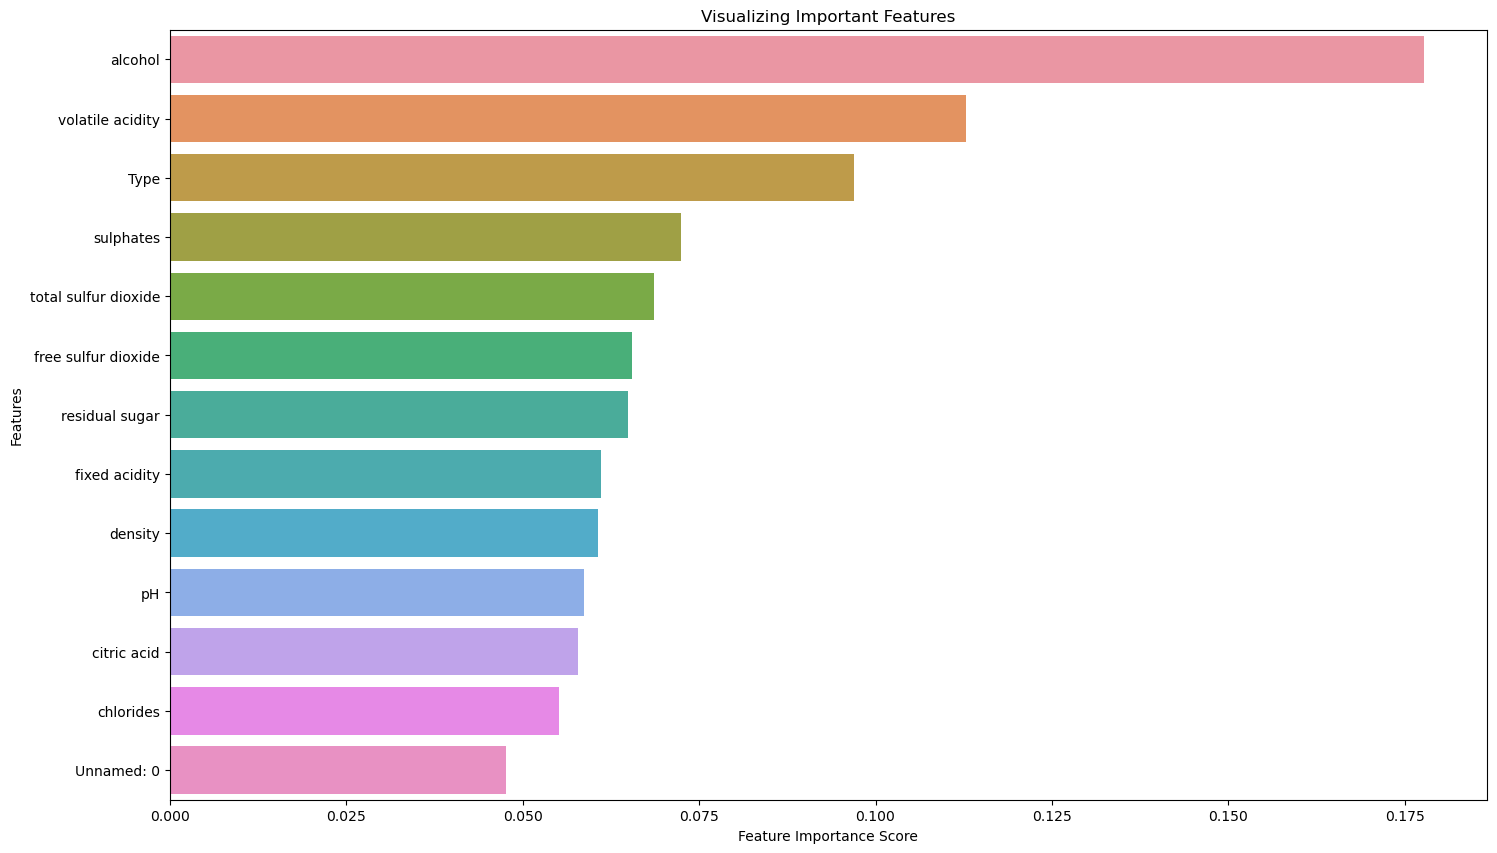

XgBoost test Accuracy: 0.9949207326458366
XgBoost test F1 Score
:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2485
           1       1.00      1.00      1.00      4012

    accuracy                           0.99      6497
   macro avg       0.99      0.99      0.99      6497
weighted avg       0.99      0.99      0.99      6497



In [27]:
xGboost_flow(quality_of_wine_X_train, quality_of_wine_X_test, quality_of_wine_y_train, quality_of_wine_y_test)

## Wine quality probability classification

In [28]:
quality_of_wine_data['quality'] = Binarizer(threshold=4.99).fit_transform([quality_of_wine_data['quality']])[0]
quality_of_wine_data = quality_of_wine_data.drop(['Unnamed: 0', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'chlorides', 'total sulfur dioxide', 'pH', 'Type'], axis=1)

quality_of_wine_target = quality_of_wine_data['quality']
quality_of_wine_data = quality_of_wine_data.drop(columns = ['quality'], axis = 1)

# Splitting the data
_, quality_of_wine_reduced_data, _, quality_of_wine_reduced_target = train_test_split(quality_of_wine_data, quality_of_wine_target, test_size=.08)
quality_of_wine_X_train, quality_of_wine_X_test, quality_of_wine_y_train, quality_of_wine_y_test = train_test_split(quality_of_wine_reduced_data, quality_of_wine_reduced_target, test_size=.3)

In [29]:
# Correction check
quality_of_wine_X_train.isna().any().any()

False

In [30]:
quality_of_wine_X_train.shape, quality_of_wine_y_train.shape, quality_of_wine_X_test.shape, quality_of_wine_y_test.shape

((1819, 5), (1819,), (780, 5), (780,))

Fold 1
Accuracy for fold 1 is 0.01 

F1 Score for fold 1 is 0.01 

Fold 2
Accuracy for fold 2 is 0.00 

F1 Score for fold 2 is 0.02 

Accuracy for fcalc(method=standard, alpha=0.3): 0.006045769412106046
F1 Score for fcalc(method=standard, alpha=0.3): 0.012070977941285109
Fold 1
Accuracy for fold 1 is 0.00 

F1 Score for fold 1 is 0.00 

Fold 2
Accuracy for fold 2 is 0.00 

F1 Score for fold 2 is 0.00 

Accuracy for fcalc(method=standard, alpha=0.6): 0.0
F1 Score for fcalc(method=standard, alpha=0.6): 0.0
Fold 1
Accuracy for fold 1 is 0.00 

F1 Score for fold 1 is 0.00 

Fold 2
Accuracy for fold 2 is 0.00 

F1 Score for fold 2 is 0.00 

Accuracy for fcalc(method=standard, alpha=0.9): 0.0
F1 Score for fcalc(method=standard, alpha=0.9): 0.0


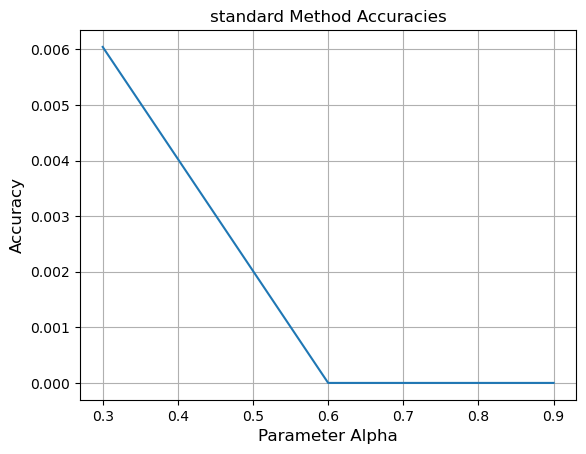

Fold 1
Accuracy for fold 1 is 0.04 

F1 Score for fold 1 is 0.04 

Fold 2
Accuracy for fold 2 is 0.03 

F1 Score for fold 2 is 0.03 

Accuracy for fcalc(method=standard-support, alpha=0.3): 0.03902972714853903
F1 Score for fcalc(method=standard-support, alpha=0.3): 0.037632376450705066
Fold 1
Accuracy for fold 1 is 0.04 

F1 Score for fold 1 is 0.04 

Fold 2
Accuracy for fold 2 is 0.04 

F1 Score for fold 2 is 0.03 

Accuracy for fcalc(method=standard-support, alpha=0.6): 0.03957978215403958
F1 Score for fcalc(method=standard-support, alpha=0.6): 0.03821876522017779
Fold 1
Accuracy for fold 1 is 0.04 

F1 Score for fold 1 is 0.04 

Fold 2
Accuracy for fold 2 is 0.04 

F1 Score for fold 2 is 0.03 

Accuracy for fcalc(method=standard-support, alpha=0.9): 0.03957978215403958
F1 Score for fcalc(method=standard-support, alpha=0.9): 0.03821876522017779


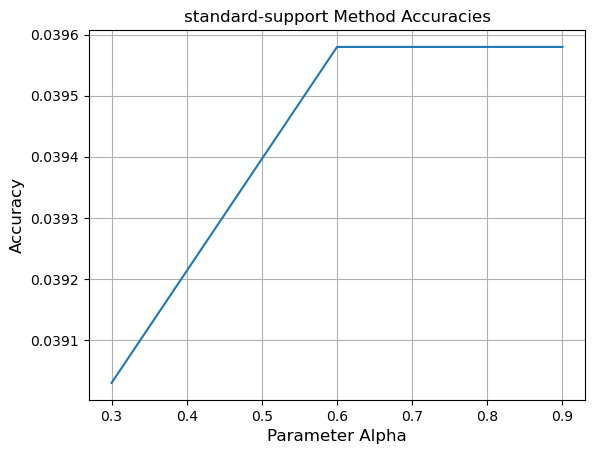

Fold 1
Accuracy for fold 1 is 0.60 

F1 Score for fold 1 is 0.43 

Fold 2
Accuracy for fold 2 is 0.10 

F1 Score for fold 2 is 0.10 

Accuracy for fcalc(method=ratio-support, alpha=0.3): 0.3495049504950495
F1 Score for fcalc(method=ratio-support, alpha=0.3): 0.2645477207917962
Fold 1
Accuracy for fold 1 is 0.69 

F1 Score for fold 1 is 0.46 

Fold 2
Accuracy for fold 2 is 0.20 

F1 Score for fold 2 is 0.19 

Accuracy for fcalc(method=ratio-support, alpha=0.6): 0.4435166044076935
F1 Score for fcalc(method=ratio-support, alpha=0.6): 0.3230331801095667
Fold 1
Accuracy for fold 1 is 0.73 

F1 Score for fold 1 is 0.49 

Fold 2
Accuracy for fold 2 is 0.38 

F1 Score for fold 2 is 0.30 

Accuracy for fcalc(method=ratio-support, alpha=0.9): 0.5562530978372562
F1 Score for fcalc(method=ratio-support, alpha=0.9): 0.3959216964408886


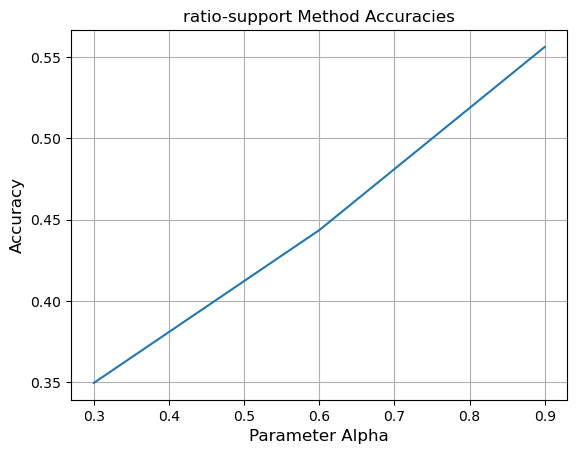

fcalc(method=ratio-support, alpha=0.9) test Accuracy: 0.41794871794871796
fcalc(method=ratio-support, alpha=0.9) test F1 Score: 0.33042906087627344


In [31]:
fcals_performer(quality_of_wine_X_train, quality_of_wine_y_train, quality_of_wine_X_test, quality_of_wine_y_test, alphas=[0.3, 0.6, 0.9])

## Conclusions
We have achieved poor enough results. 
Both of our macro f1-score and accuracy aren't good.
Maybe the quality of our results is due to the fact that the dataset was trimmed. We have taken just 8% of the data but even with such amount the process of studies took too long time.

P.S. I have to admit, it was a bit frustrating to wait for more than 6 hours while the classification procces is over and to get such unappealing results.

## Data scientists job change data analysis:

In [32]:
le = LabelEncoder()

data_scientists_job_change_data_new = data_scientists_job_change_data
data_scientists_job_change_target_new = data_scientists_job_change_data_new['target']
data_scientists_job_change_data_new = data_scientists_job_change_data_new.drop(columns = ['target'], axis = 1)

for col in data_scientists_job_change_data_new.columns:
    le.fit(data_scientists_job_change_data_new[col])
    data_scientists_job_change_data_new[col] = le.transform(data_scientists_job_change_data_new[col])

data_scientists_job_change_X_train, data_scientists_job_change_X_test, data_scientists_job_change_y_train, data_scientists_job_change_y_test = train_test_split(data_scientists_job_change_data_new, data_scientists_job_change_target_new, test_size=.2)

accuracy mean value: 0.7640615113506127
accuracy STD value: 0.005808516493347149
accuracy mean value: 0.7632781578518913
accuracy STD value: 0.005296402624222027
accuracy mean value: 0.7662796614768725
accuracy STD value: 0.003190496833702528
accuracy mean value: 0.7681719304182375
accuracy STD value: 0.00566767013076672
accuracy mean value: 0.7677800940483905
accuracy STD value: 0.0029758789611403634
accuracy mean value: 0.773130572750229
accuracy STD value: 0.00433901016289644
accuracy mean value: 0.7780893002131466
accuracy STD value: 0.0028788866202759307
accuracy mean value: 0.7806342679644876
accuracy STD value: 0.004464206142892527
accuracy mean value: 0.7850055069067785
accuracy STD value: 0.0036945865893780725
accuracy mean value: 0.7886596029280784
accuracy STD value: 0.0020865759752518717
Feature importances:
company_type_nom: 0.17152343690395355
city_development_index: 0.16797438263893127
major_discipline_nom: 0.09615388512611389
experience_ord: 0.074669249355793
enrolled_u

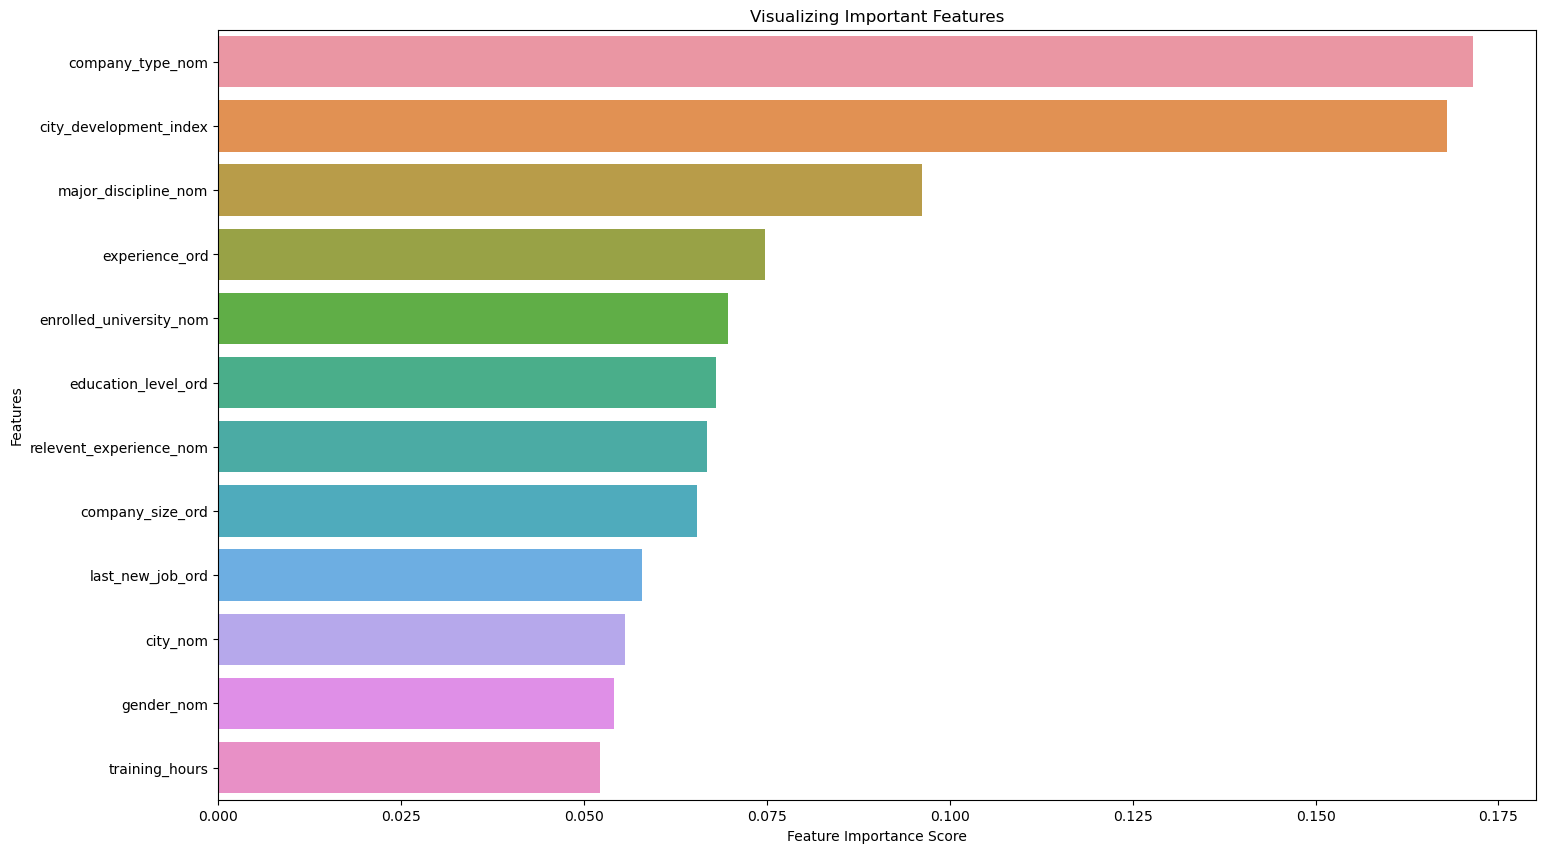

XgBoost test Accuracy: 0.7573068893528184
XgBoost test F1 Score
:               precision    recall  f1-score   support

         0.0       0.82      0.87      0.84      2882
         1.0       0.51      0.43      0.47       950

    accuracy                           0.76      3832
   macro avg       0.67      0.65      0.65      3832
weighted avg       0.74      0.76      0.75      3832



In [33]:
xGboost_flow(data_scientists_job_change_X_train, data_scientists_job_change_X_test, data_scientists_job_change_y_train, data_scientists_job_change_y_test)

## Data scientists job change probability classification
Here we do not have special data, so we'll take the treshold a bit lower than mean values.

In [34]:
import pandas as pd
from sklearn.preprocessing import Binarizer

# Splitting the dataset into features and target variable
data_scientists_job_change_data_target = data_scientists_job_change_data['target']
data_scientists_job_change_data = data_scientists_job_change_data.drop(columns=['target'], axis=1)

# Splitting the data into training and test sets
_, data_scientists_job_change_data, _, data_scientists_job_change_target = train_test_split(data_scientists_job_change_data, data_scientists_job_change_data_target, test_size=.1)
data_scientists_job_change_X_train, data_scientists_job_change_X_test, data_scientists_job_change_y_train, data_scientists_job_change_data_y_test = train_test_split(data_scientists_job_change_data, data_scientists_job_change_target, test_size=0.3)

In [35]:
# Correction check
data_scientists_job_change_X_train.isna().any().any()

False

In [36]:
data_scientists_job_change_X_train

,city_nom,city_development_index,gender_nom,relevent_experience_nom,enrolled_university_nom,education_level_ord,major_discipline_nom,experience_ord,company_size_ord,company_type_nom,last_new_job_ord,training_hours
4319,64.0,-1.660590,1.0,0.0,3.0,2.0,5.0,6.0,2.0,5.0,1.0,-1.038464
16736,49.0,0.738919,3.0,1.0,3.0,2.0,5.0,20.0,2.0,6.0,4.0,-0.738748
14789,13.0,0.787558,1.0,1.0,3.0,1.0,6.0,4.0,2.0,5.0,1.0,0.776482
9368,5.0,0.738919,1.0,0.0,3.0,3.0,2.0,5.0,4.0,5.0,1.0,-0.755399
9031,114.0,0.779452,3.0,1.0,3.0,1.0,6.0,0.0,2.0,5.0,0.0,0.110447
...,...,...,...,...,...,...,...,...,...,...,...,...
11419,2.0,0.471406,3.0,0.0,3.0,2.0,5.0,15.0,0.0,5.0,5.0,-0.488985
6942,91.0,0.682174,1.0,0.0,3.0,2.0,5.0,22.0,3.0,5.0,1.0,-0.871955
15688,64.0,-1.660590,3.0,0.0,3.0,2.0,5.0,6.0,3.0,5.0,4.0,-0.855304
3500,49.0,0.738919,1.0,1.0,3.0,3.0,5.0,22.0,2.0,6.0,5.0,0.376861


In [37]:
data_scientists_job_change_X_train.shape, data_scientists_job_change_X_test.shape, data_scientists_job_change_y_train.shape, data_scientists_job_change_data_y_test.shape 

((1341, 12), (575, 12), (1341,), (575,))

Fold 1
Accuracy for fold 1 is 0.00 

F1 Score for fold 1 is 0.00 

Fold 2
Accuracy for fold 2 is 0.00 

F1 Score for fold 2 is 0.00 

Accuracy for fcalc(method=standard, alpha=0.5): 0.0
F1 Score for fcalc(method=standard, alpha=0.5): 0.0
Fold 1
Accuracy for fold 1 is 0.00 

F1 Score for fold 1 is 0.00 

Fold 2
Accuracy for fold 2 is 0.00 

F1 Score for fold 2 is 0.00 

Accuracy for fcalc(method=standard, alpha=0.6): 0.0
F1 Score for fcalc(method=standard, alpha=0.6): 0.0
Fold 1
Accuracy for fold 1 is 0.00 

F1 Score for fold 1 is 0.00 

Fold 2
Accuracy for fold 2 is 0.00 

F1 Score for fold 2 is 0.00 

Accuracy for fcalc(method=standard, alpha=0.7): 0.0
F1 Score for fcalc(method=standard, alpha=0.7): 0.0
Fold 1
Accuracy for fold 1 is 0.00 

F1 Score for fold 1 is 0.00 

Fold 2
Accuracy for fold 2 is 0.00 

F1 Score for fold 2 is 0.00 

Accuracy for fcalc(method=standard, alpha=0.8): 0.0
F1 Score for fcalc(method=standard, alpha=0.8): 0.0
Fold 1
Accuracy for fold 1 is 0.00 

F1 Score fo

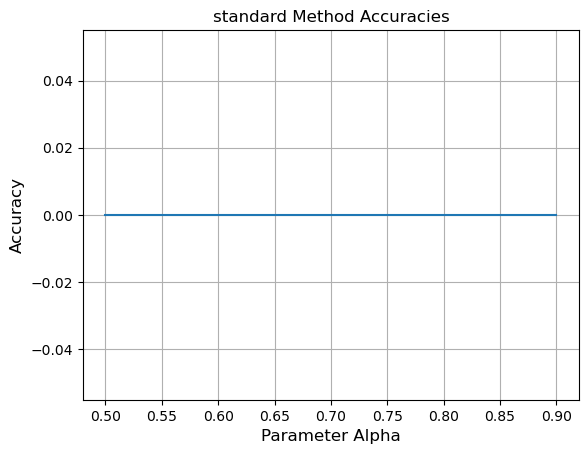

Fold 1
Accuracy for fold 1 is 0.25 

F1 Score for fold 1 is 0.20 

Fold 2
Accuracy for fold 2 is 0.28 

F1 Score for fold 2 is 0.22 

Accuracy for fcalc(method=standard-support, alpha=0.5): 0.26399448361767913
F1 Score for fcalc(method=standard-support, alpha=0.5): 0.20872078936595068
Fold 1
Accuracy for fold 1 is 0.25 

F1 Score for fold 1 is 0.20 

Fold 2
Accuracy for fold 2 is 0.28 

F1 Score for fold 2 is 0.22 

Accuracy for fcalc(method=standard-support, alpha=0.6): 0.26399448361767913
F1 Score for fcalc(method=standard-support, alpha=0.6): 0.20872078936595068
Fold 1
Accuracy for fold 1 is 0.25 

F1 Score for fold 1 is 0.20 

Fold 2
Accuracy for fold 2 is 0.28 

F1 Score for fold 2 is 0.22 

Accuracy for fcalc(method=standard-support, alpha=0.7): 0.26399448361767913
F1 Score for fcalc(method=standard-support, alpha=0.7): 0.20872078936595068
Fold 1
Accuracy for fold 1 is 0.25 

F1 Score for fold 1 is 0.20 

Fold 2
Accuracy for fold 2 is 0.28 

F1 Score for fold 2 is 0.22 

Accuracy

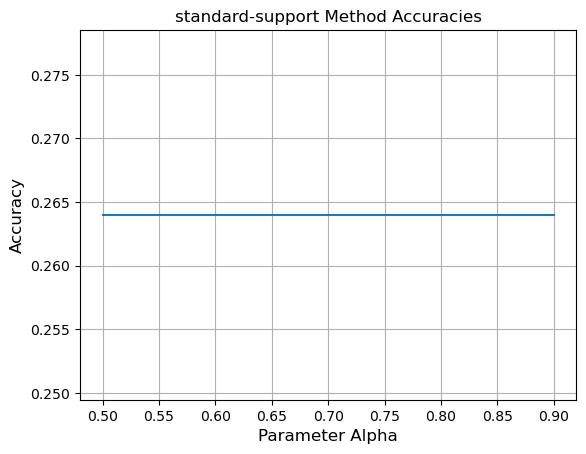

Fold 1
Accuracy for fold 1 is 0.63 

F1 Score for fold 1 is 0.61 

Fold 2
Accuracy for fold 2 is 0.63 

F1 Score for fold 2 is 0.62 

Accuracy for fcalc(method=ratio-support, alpha=0.5): 0.6286373645928331
F1 Score for fcalc(method=ratio-support, alpha=0.5): 0.6123244938907341
Fold 1
Accuracy for fold 1 is 0.65 

F1 Score for fold 1 is 0.63 

Fold 2
Accuracy for fold 2 is 0.65 

F1 Score for fold 2 is 0.63 

Accuracy for fcalc(method=ratio-support, alpha=0.6): 0.6472773984029183
F1 Score for fcalc(method=ratio-support, alpha=0.6): 0.6273047236828604
Fold 1
Accuracy for fold 1 is 0.65 

F1 Score for fold 1 is 0.62 

Fold 2
Accuracy for fold 2 is 0.68 

F1 Score for fold 2 is 0.65 

Accuracy for fcalc(method=ratio-support, alpha=0.7): 0.664443801855106
F1 Score for fcalc(method=ratio-support, alpha=0.7): 0.6387542720847266
Fold 1
Accuracy for fold 1 is 0.69 

F1 Score for fold 1 is 0.65 

Fold 2
Accuracy for fold 2 is 0.69 

F1 Score for fold 2 is 0.66 

Accuracy for fcalc(method=ratio-s

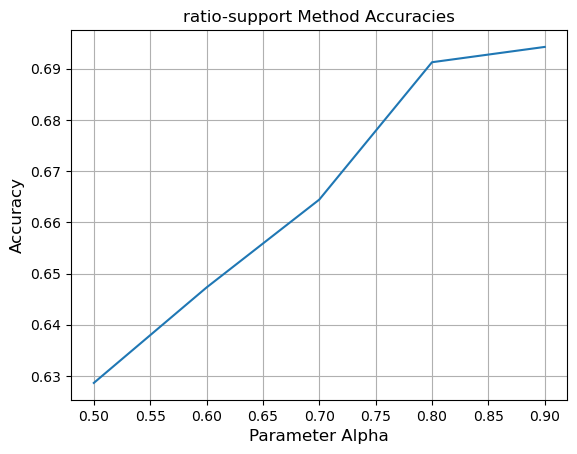

fcalc(method=ratio-support, alpha=0.9) test Accuracy: 0.7408695652173913
fcalc(method=ratio-support, alpha=0.9) test F1 Score: 0.7166841379492792


In [38]:
fcals_performer(data_scientists_job_change_X_train, data_scientists_job_change_y_train, data_scientists_job_change_X_test, data_scientists_job_change_data_y_test, alphas=[0.5, 0.6, 0.7, 0.8, 0.9])

## Conclusions
We have achieved rather good results. Our macro f1-score and accuracy are note so bad)
F1-score is higher than binary FCALC ahieved, which means our new model is more stable.
Maybe in case of taking at least 12% of the dataset as it was before, we could achieve even better results. 
It must be mentioned that it took 5 hours to get the results of the model performance.